Wie groß Distanzen zwischen Punkten?

In [1]:
import numpy as np
from osgeo import ogr 
import os 
import sys
import matplotlib.pyplot as plt

sys.path.append("/home/riannek/code/gleis/gleisachse")
from algs.gpkg import * 

ogr.UseExceptions()

In [2]:
folder = "/media/riannek/minimax/gleis/"
file = os.path.join(folder, "stage3tmp.gpkg")

ds = ogr.Open(file)

layer = ds.GetLayerByName("centerlines")

layer.GetFeatureCount()

8

In [3]:
feature = layer.GetNextFeature()
print("FID", feature.GetFID())
geom = feature.GetGeometryRef() 
num_points = geom.GetPointCount()   

coords = np.array([geom.GetPoint(i) for i in range(num_points)])

FID 1


In [4]:
x = coords[:, 0]
y = coords[:, 1] 
idx = np.arange(len(x))

In [5]:
distances = []
for point in range(len(x) - 1):
    p1 = coords[point]
    p2 = coords[point + 1]
    distance = np.linalg.norm(p2 - p1)
    distances.append(distance)

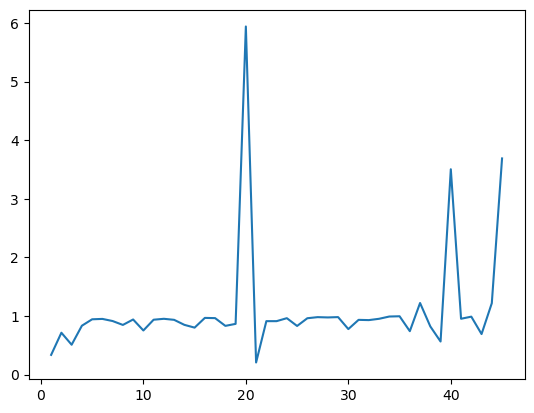

In [6]:
fig, ax = plt.subplots()
ax.plot(idx[1:], distances, label="Centerline")

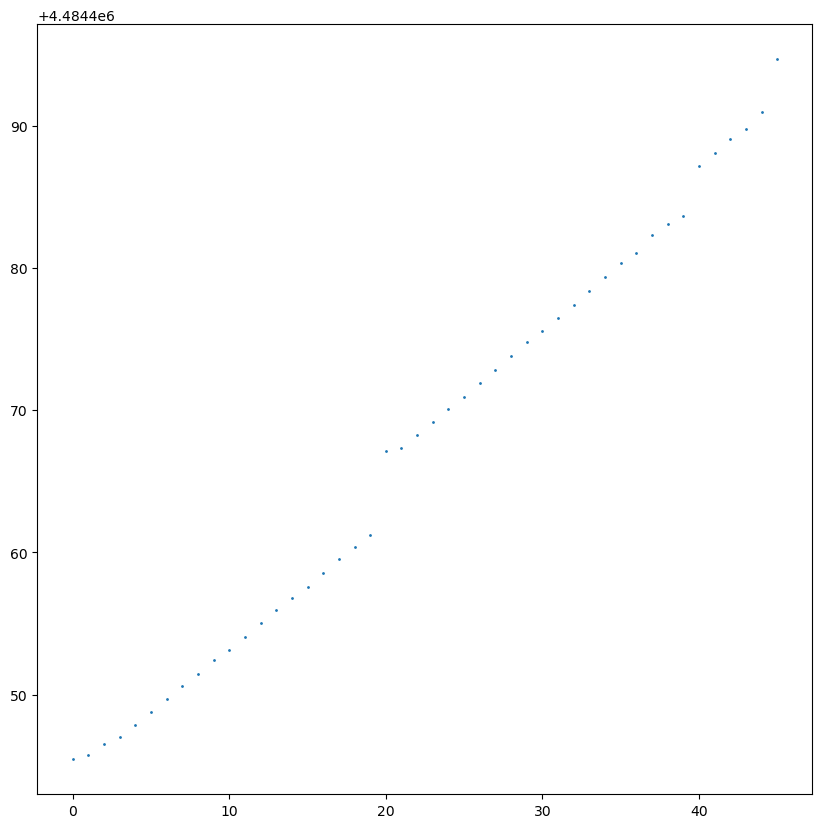

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(idx, x, s=1)

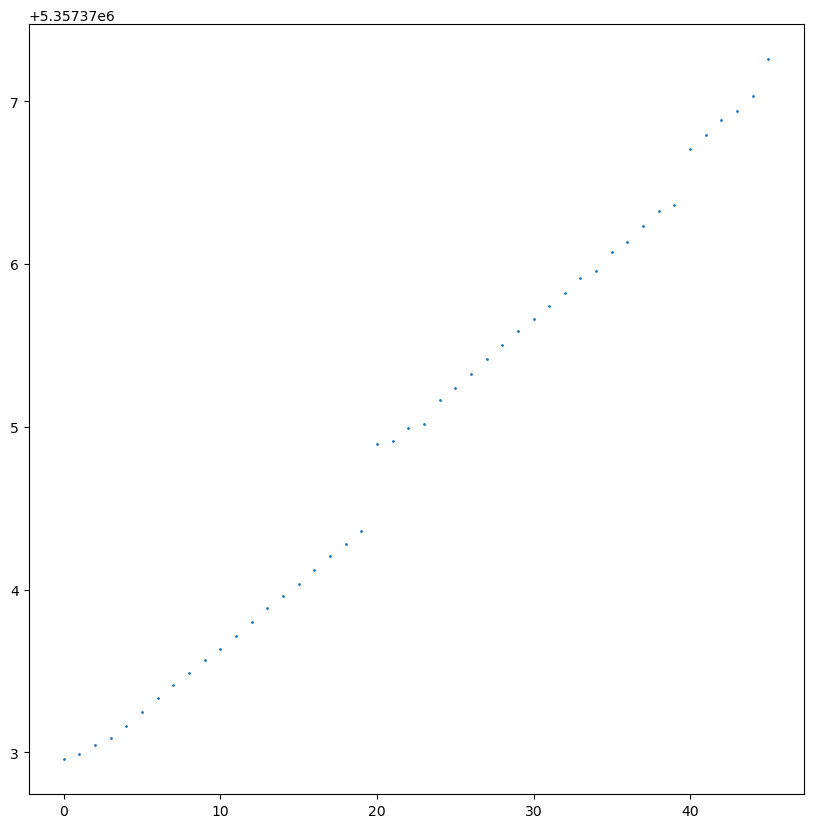

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(idx, y, s=1)

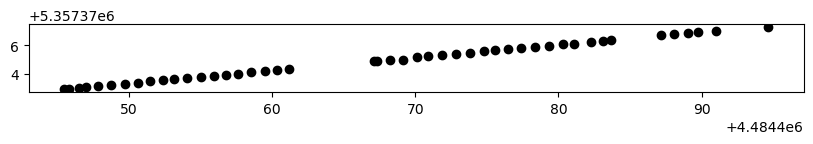

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x, y, color="black")
ax.set_aspect('equal', adjustable='box')
